# **Brain and Cognitive Society, IIT Kanpur**
## **Introduction to Deep Learning Workshop**
**This python notebook is an assingment on ML/DL**

In this assingment you will solve a **regression** problem of predicting House prices using basic python libraries, and build a **neural network** for handwritten digit identification using **TensorFlow**

## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### **Dataset Preparation**

In [2]:
# Execute this cell for loading dataset in a pandas dataframe

from IPython.display import clear_output
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset

data_df = pd.read_csv("Linear_regression_dataset.csv")

In [3]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [4]:
# Remove T000000 part from data column. Hint: search about .str.replace() method. :)  
data_df['date'] = data_df['date'].str.replace("T000000", "") 


# Create a numpy array which does not have "id" field
data_array = data_df.to_numpy()[:,1:].astype(np.float)
assert (data_array.shape == (21613,20))

data_df.head()

D:\ProgramData\Anaconda3\envs\learnTF\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [5]:
# this should be an array, each entry should be mean of a column
mean = np.mean(data_array, axis = 0)

# this should be an array, each entry should be standard deviation of a column
sd = np.std(data_array, axis = 0)

data_array_norm = (data_array - mean)/sd

print(data_array_norm.shape)

(21613, 20)


The last step is to make train and test dataset and to create seperate vector for price

In [6]:
# extract the price column from data
labels = data_array[:,2] 

# delete the price column from data_array_norm. Hint: use np.delete()
x_array_norm = np.delete(data_array_norm, 2, 1)

# splitting data into test and train set.
x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 19) (3242, 19) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [7]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth
  
  output:
  mse: [scalar] the MES loss
  """
  mse = np.square(y_true - y_pred).mean(axis = 0)                # fill code here

  return mse

In [8]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  
  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = np.matmul(x, a) + b * np.ones((m,))                   # fill code here

  assert(y_pred.shape == (m,))
  return y_pred

In [9]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)

  # write code to calculate derivative of loss with respect to a
  da = -2 * (x * (y_true - yp)[:,np.newaxis]).mean(axis = 0)
  # write code to calculate derivative of loss with respect to b
  db = -2 * (y_true - yp).mean(axis = 0)

  assert(da.shape ==(n,))
  return (da,db)

In [10]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)
  
  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a = np.ones((n,))                             # initialize a- weights and b- bias
  b = np.random.randint(1)

  for i in range(epochs):
    # calculate derivative using gradient() function
    # apply gradient descent now to update a and b
    
    da, db = gradient(x, a, b, y_true)
    a = a - learning_rate * da
    b = b - learning_rate * db
    l_mse = np.mean(y_true - y(x, a, b))        # calculate loss at this point
    loss_mse.append(l_mse)

    print("Epoch ",i+1," Completed!","loss = ",l_mse)
  
  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

### **Training** 

In [11]:
epochs = 100              # tweak this!!!
learn_rate = 0.02         # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(x_train,y_train,learn_rate,epochs)

Epoch  1  Completed! loss =  3.2562012930337016
Epoch  2  Completed! loss =  3.123157772327235
Epoch  3  Completed! loss =  2.9959283549096813
Epoch  4  Completed! loss =  2.8741839625245187
Epoch  5  Completed! loss =  2.7576285961458167
Epoch  6  Completed! loss =  2.6459938064267856
Epoch  7  Completed! loss =  2.539034282712086
Epoch  8  Completed! loss =  2.4365243236054916
Epoch  9  Completed! loss =  2.338255002833004
Epoch  10  Completed! loss =  2.2440318839954316
Epoch  11  Completed! loss =  2.153673169104291
Epoch  12  Completed! loss =  2.0670081903782815
Epoch  13  Completed! loss =  1.9838761740874313
Epoch  14  Completed! loss =  1.9041252204007881
Epoch  15  Completed! loss =  1.8276114551108011
Epoch  16  Completed! loss =  1.7541983184713603
Epoch  17  Completed! loss =  1.683755963745176
Epoch  18  Completed! loss =  1.6161607438401229
Epoch  19  Completed! loss =  1.5512947689613943
Epoch  20  Completed! loss =  1.489045521782116
Epoch  21  Completed! loss =  1.429

### **Evaluation and Visualization**
Lets plot how loss varies with epochs


Loss on test data =  0.5932401554677443


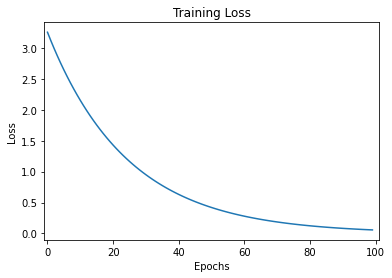

In [12]:
test_loss = loss(y(x_train,a,b), y_train)

print("Loss on test data = ",test_loss)

# Visualization of loss
plt.plot(train_loss)                   # plot loss versus epochs
plt.xlim(-1, 101)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [13]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [14]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 7       9       2       5       6       

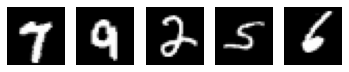

In [15]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [16]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(x_train.shape[0], 28*28)
x_train_flatten = x_train_flatten.astype('float32') / 255                                  # flatten the images of training set 
x_test_flatten = x_test.reshape(x_test.shape[0], 28*28)
x_test_flatten = x_test_flatten.astype('float32') /255                                     # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

x_validation = x_train_flatten[-10000:]
y_validation = y_train[-10000:]

x_train_flatten = x_train_flatten[:40000]
y_train = y_train[:40000]

y_train = keras.utils.to_categorical(y_train, 10)
y_test_catagorical = keras.utils.to_categorical(y_test, 10)
y_validation = keras.utils.to_categorical(y_validation, 10)


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [17]:
model = keras.models.Sequential([
    #keras.Input(),
    layers.Dense(64, activation="relu", input_shape = (784,)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(10, activation="softmax"),
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000018EC2319D48>>

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [18]:
model.compile(optimizer="rmsprop",loss = "categorical_crossentropy",metrics=["accuracy"])

n_epochs = 50               # set number of epochs
batch_size = 512            # you can tweak with these parametrs
history = model.fit(x_train_flatten, y_train, 
                    batch_size=batch_size,
                    epochs=n_epochs,
                    verbose=1,
                    validation_data=(x_validation, y_validation))

Epoch 1/50
79/79 [==============================] - 1s 9ms/step - loss: 1.3387 - accuracy: 0.5588 - val_loss: 0.5318 - val_accuracy: 0.8760
Epoch 2/50
79/79 [==============================] - 0s 5ms/step - loss: 0.7587 - accuracy: 0.7630 - val_loss: 0.3402 - val_accuracy: 0.9076
Epoch 3/50
79/79 [==============================] - 0s 5ms/step - loss: 0.5854 - accuracy: 0.8221 - val_loss: 0.2764 - val_accuracy: 0.9233
Epoch 4/50
79/79 [==============================] - 0s 6ms/step - loss: 0.5042 - accuracy: 0.8478 - val_loss: 0.2435 - val_accuracy: 0.9292
Epoch 5/50
79/79 [==============================] - 0s 5ms/step - loss: 0.4517 - accuracy: 0.8665 - val_loss: 0.2256 - val_accuracy: 0.9350
Epoch 6/50
79/79 [==============================] - 0s 5ms/step - loss: 0.4255 - accuracy: 0.8745 - val_loss: 0.2099 - val_accuracy: 0.9382
Epoch 7/50
79/79 [==============================] - 0s 5ms/step - loss: 0.4031 - accuracy: 0.8824 - val_loss: 0.2061 - val_accuracy: 0.9410
Epoch 8/50
79/79 [==

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 [==============================] - 0s 1ms/step - loss: 0.1423 - accuracy: 0.9627
Loss =  0.1423085331916809
Accuracy =  96.27000093460083 %


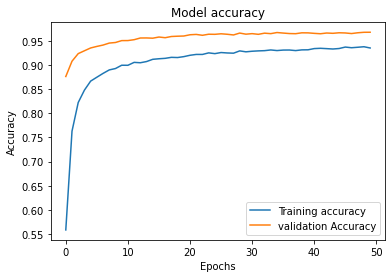

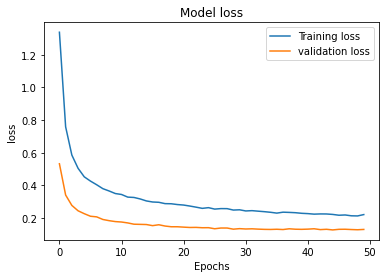

In [19]:
results = model.evaluate(x_test_flatten, y_test_catagorical)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="validation loss")
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


Lets show our results on images from testing dataset

label: 
9    0    7    6    1    4    6    3    5    9    

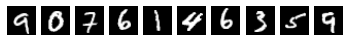

Predicted value: 
9    0    7    6    1    4    6    3    5    9    

In [21]:
n = 10   # = no. of images to see predictions on

index = np.random.choice(x_test.shape[0],10)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind],cmap="gray")             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="    ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

y_pred = model.predict(x_test_flatten)
for i,ind in enumerate(index):
    # write code to predict and print digit in image
    # Hint: the output of the model is a 10-d vector which gives probabilties
    # The digit in the image would be the class for which probability is highest...

    digit = np.argmax(y_pred[ind])
    print(digit,end="    ")

That's it you have completed the assignment !!

We hope that you learned something from this exercise

### Credits:

**Leaders:**

Mohit Kulkarni

Shivanshu Tyagi

**Scretaries:**

Sahil Bansal

Shashwat Gupta

Rashmi Sharma